In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# get train files

import glob

train_folders = ['CAR', 'UAH', 'UJITI', 'UJIUB']

train_files_names = []
n_files = 0
for building in train_folders:
    cur_file_names = glob.glob('train/' + building + '/log*')
    train_files_names.append(sorted(cur_file_names))
    n_files += len(cur_file_names)

print(train_files_names)
print('There are %d training files' % n_files)

[['train/CAR/logfile_CAR_R1_S3.txt', 'train/CAR/logfile_CAR_R1_S3mini.txt', 'train/CAR/logfile_CAR_R2_S3.txt', 'train/CAR/logfile_CAR_R2_S4.txt'], ['train/UAH/logfile_UAH_R1_S3.txt', 'train/UAH/logfile_UAH_R1_S4.txt', 'train/UAH/logfile_UAH_R2_S3.txt', 'train/UAH/logfile_UAH_R2_S4.txt', 'train/UAH/logfile_UAH_R4_S3.txt', 'train/UAH/logfile_UAH_R4_S4.txt'], ['train/UJITI/logfile_UJITI_R1_NEXUS5.txt', 'train/UJITI/logfile_UJITI_R2_NEXUS5.txt'], ['train/UJIUB/logfile_UJIUB_R1n_S3.txt', 'train/UJIUB/logfile_UJIUB_R1r_S3.txt', 'train/UJIUB/logfile_UJIUB_R2n_S3.txt', 'train/UJIUB/logfile_UJIUB_R2r_S3.txt', 'train/UJIUB/logfile_UJIUB_R3_S3.txt']]
There are 17 training files


In [3]:
# import files into dataframe

import pandas as pd

track_data = []
for building in train_files_names:
    track_data.append([])
    for track_name in building:
        print(track_name)
        track_data[-1].append(pd.read_csv(track_name, sep=';', engine='c', names=range(11)))
        print(np.unique(track_data[-1][-1][0]))


train/CAR/logfile_CAR_R1_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN' 'WIFI']
train/CAR/logfile_CAR_R1_S3mini.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'MAGN' 'POSI' 'SOUN' 'WIFI']
train/CAR/logfile_CAR_R2_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'PROX' 'SOUN'
 'WIFI']
train/CAR/logfile_CAR_R2_S4.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'HUMI' 'LIGH' 'MAGN' 'POSI' 'PRES' 'PROX'
 'SOUN' 'TEMP' 'WIFI']
train/UAH/logfile_UAH_R1_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN' 'WIFI']
train/UAH/logfile_UAH_R1_S4.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'HUMI' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN'
 'TEMP' 'WIFI']
train/UAH/logfile_UAH_R2_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN' 'WIFI']
train/UAH/logfile_UAH_R2_S4.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'HUMI' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN'
 'TEMP' 'WIFI']
train/UAH/logfile_UAH_R4_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN' 'WIFI']
train/UAH/logf

/usr/local/lib/python3.4/dist-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# count wifi stations in each track

unique_aps = []
unique_macs = []
for building in track_data:
    for track in building:
        wifi_data = track.iloc[track[0].values == 'WIFI']
        wifi_names = wifi_data[3].values.astype(str)
        wifi_macs = wifi_data[4].values
        unique_aps.append(list(np.unique(wifi_names)))
        unique_macs.append(list(np.unique(wifi_macs)))

In [7]:
# Common items between two lists
def custom_cor(list1, list2):
    count = 0
    for item1 in list1:
        if item1 in list2:
            count += 1
    return count / min(len(list1), len(list2))

aps_cor = np.zeros((n_files, n_files))
mac_cor = np.zeros((n_files, n_files))
for i in range(n_files):
    for j in range(i, n_files):
        aps_cor[i, j] = custom_cor(unique_aps[i], unique_aps[j])
        mac_cor[i, j] = custom_cor(unique_macs[i], unique_macs[j])

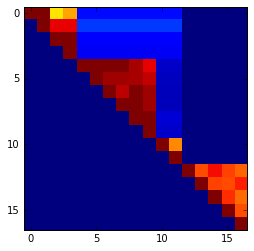

In [10]:
# plot ap names correlation
plt.imshow(aps_cor, interpolation='nearest')

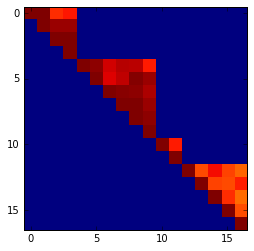

In [11]:
# plot ap macs correlation
plt.imshow(mac_cor, interpolation='nearest')

In [17]:
# add building label
building_index = [[10, 10, 10, 10], [20, 20, 20, 20, 20, 20], [40, 40], [30, 30, 30, 30, 30]]

for i in range(len(track_data)):
    for j in range(len(track_data[i])):
        track_data[i][j]['buildingID'] = building_index[i][j]

In [34]:
# associate signals with POSI ids
def posi_time_limits(posi_array):
    posiarray['ind_strt_time'] = np.zeros((posiarray.shape[0]))
    posiarray['ind_end_time'] = np.zeros((posiarray.shape[0]))
    posiarray['ind_end_time'].iloc[-1] = 99999
    for i in range(1, posi_array.shape[0])
    return posiarray

for i in range(len(track_data)):
    posi_data.append([])
    for j in range(len(track_data[i])):
        cur_posi = track_data[i][j][[1, 2]].iloc[track_data[i][j][0].values == 'POSI']
        cur_posi.columns = ['Time', 'index']
        cur_posi = posi_time_limits(cur_posi)
        print(cur_posi.head())
        print(cur_posi.tail())

          Time  index  ind_strt_time  ind_end_time
8512    30.341    1.0            0.0           0.0
13709   48.878    2.0            0.0           0.0
22475   80.175    3.0            0.0           0.0
27694   98.724    4.0            0.0           0.0
38394  136.709    5.0            0.0           0.0
            Time  index  ind_strt_time  ind_end_time
314491  1117.902   71.0            0.0           0.0
324496  1153.566   72.0            0.0           0.0
337497  1199.898   73.0            0.0           0.0
347410  1235.157   74.0            0.0           0.0
350661  1246.750   75.0            0.0       99999.0
          Time  index  ind_strt_time  ind_end_time
5345    31.840    1.0            0.0           0.0
8049    48.068    2.0            0.0           0.0
13028   77.821    3.0            0.0           0.0
20614  122.867    4.0            0.0           0.0
22777  135.834    5.0            0.0           0.0
            Time  index  ind_strt_time  ind_end_time
187514  1117.319 